In [1]:
# ============================================================
# Core Data Handling and Numerical Computing
# ============================================================

import numpy as np                  # Numerical computing
import pandas as pd                 # Data manipulation and analysis


# ============================================================
# Scikit-Learn: Preprocessing and Pipelines
# ============================================================

from sklearn.compose import ColumnTransformer      # Column-wise preprocessing
from sklearn.pipeline import Pipeline              # ML pipelines
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer           # Missing value handling


# ============================================================
# Scikit-Learn: Model Selection and Validation
# ============================================================

from sklearn.model_selection import (
    train_test_split,               # Train-test splitting
    KFold,                          # K-fold cross-validation
    StratifiedKFold,                # Stratified CV (mainly for classification)
    GridSearchCV,                   # Hyperparameter tuning
    cross_val_score                 # Cross-validation scoring
)


# ============================================================
# Scikit-Learn: Models and Custom Estimators
# ============================================================

from sklearn.linear_model import LinearRegression   # Baseline regression model
from sklearn.base import BaseEstimator, RegressorMixin  # Custom estimator support


# ============================================================
# Scikit-Learn: Evaluation Metrics
# ============================================================

from sklearn.metrics import mean_squared_error, r2_score


# ============================================================
# Visualization and Plotting
# ============================================================

import matplotlib.pyplot as plt     # Core plotting
import seaborn as sns               # Statistical visualization

from IPython.display import Image   # Display images in notebooks

from mlxtend.plotting import (
    scatterplotmatrix,              # Feature relationship plots
    heatmap                         # Correlation heatmaps
)


# ============================================================
# Reproducibility
# ============================================================

from numpy.random import seed        # Set random seed


# ============================================================
# Model Persistence (Saving/Loading Models)
# ============================================================

import pickle                        # Save trained models

In [2]:
df = pd.read_csv('C:/Users/vyrim/OneDrive/Documents/Homework/06Spring2026/Demo/DL_Demo/notebooks/crime.csv')
df.head()

,state,murder.rate,poverty,high.school,college,single.parent,unemployed,metropolitan,region
0,Alabama,7.4,14.7,77.5,20.4,26.0,4.6,70.2,South
1,Alaska,4.3,8.4,90.4,28.1,23.2,6.6,41.6,West
2,Arizona,7.0,13.5,85.1,24.6,23.5,3.9,87.9,West
3,Arkansas,6.3,15.8,81.7,18.4,24.7,4.4,49.0,South
4,California,6.1,14.0,81.2,27.5,21.8,4.9,96.7,West


In [3]:
df.describe(include=['int64', 'float64'])

,murder.rate,poverty,high.school,college,single.parent,unemployed,metropolitan
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,4.604000,11.440000,85.482000,24.932000,22.970000,3.904000,67.726000
std,2.510221,2.937096,3.959782,4.312319,3.038814,0.947383,20.562099
min,0.600000,7.300000,77.100000,15.300000,13.600000,2.200000,27.900000
25%,2.600000,9.425000,82.525000,22.525000,20.950000,3.225000,49.800000
50%,4.550000,10.550000,86.100000,24.450000,22.800000,3.900000,70.250000
75%,6.300000,13.375000,88.175000,27.450000,24.575000,4.400000,84.375000
max,12.500000,19.300000,91.800000,34.600000,30.000000,6.600000,100.000000


In [5]:
df.isnull().sum()

state            0
murder.rate      0
poverty          0
high.school      0
college          0
single.parent    0
unemployed       0
metropolitan     0
region           0
dtype: int64

(<Figure size 640x480 with 2 Axes>, <Axes: >)

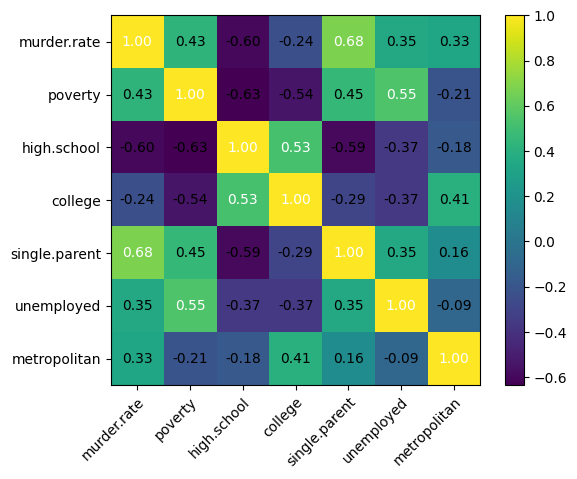

In [6]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
cm=df[numeric_features].corr().values
heatmap(cm, row_names=numeric_features, column_names=numeric_features)

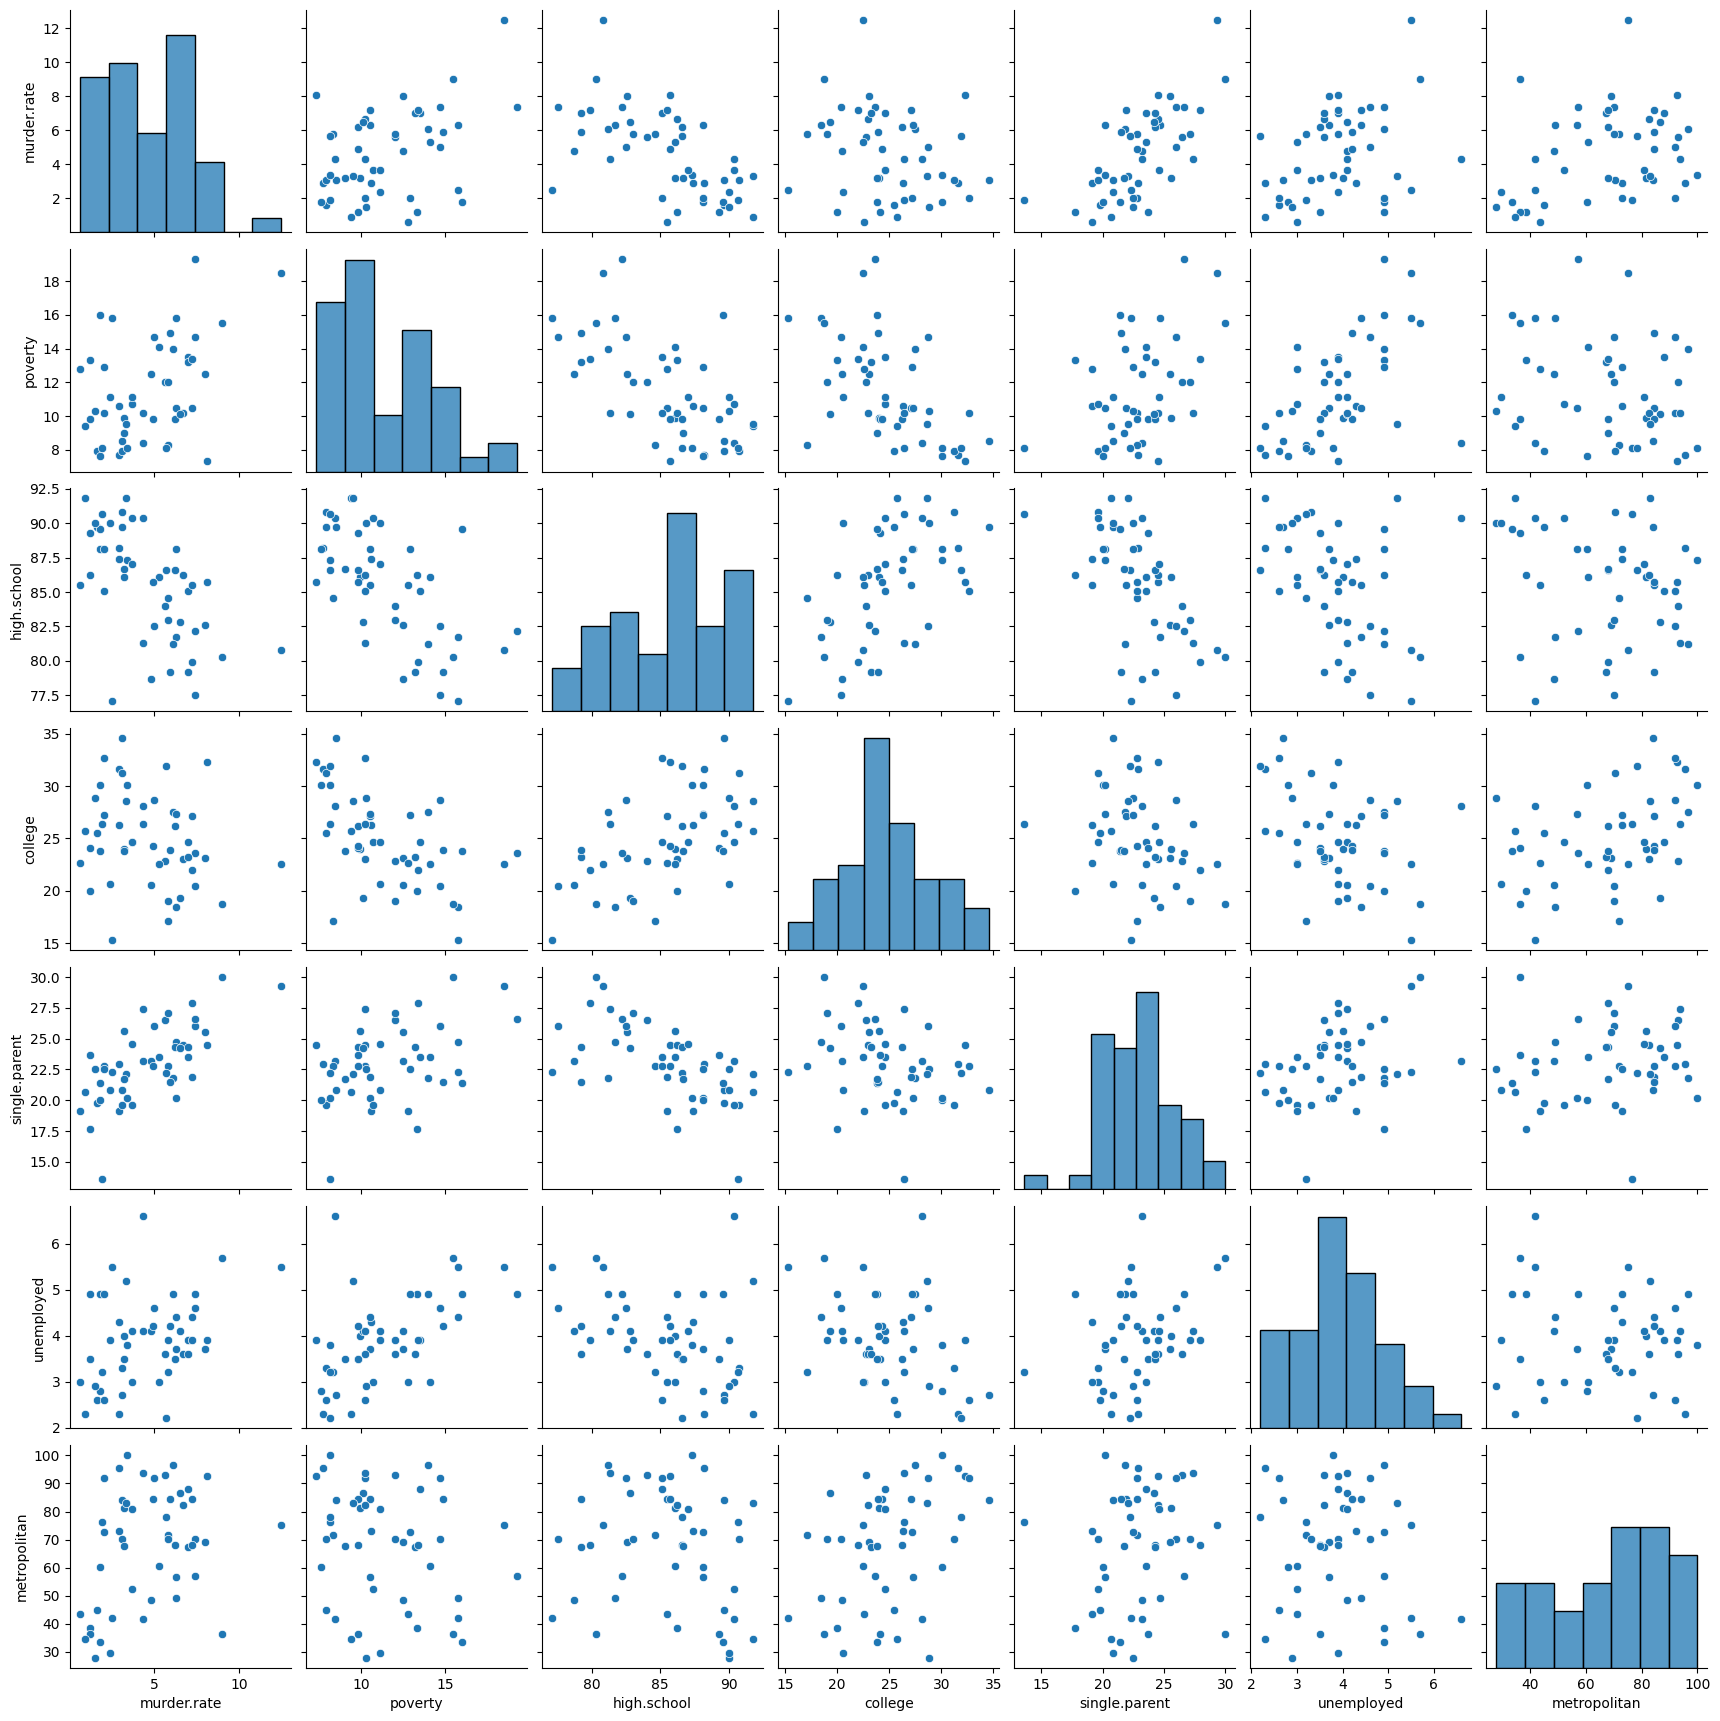

In [8]:
sns.pairplot(df)

<Axes: >

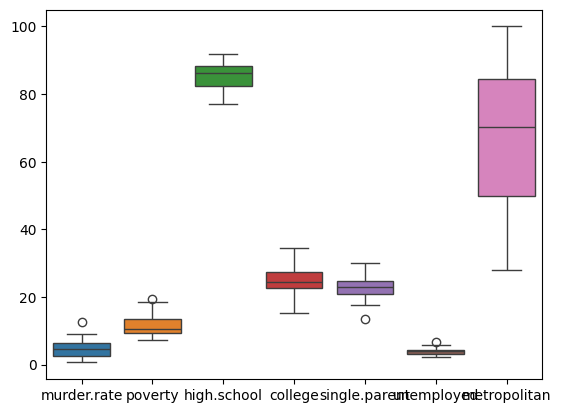

In [14]:
sns.boxplot(df[numeric_features])